<a href="https://colab.research.google.com/github/hamzadeif/hello-world/blob/main/Copy_of_DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Hamza_Deif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [8]:
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/ca_dds_expenditures.csv"
df_residents = pd.read_csv(data_dir)
df_residents

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


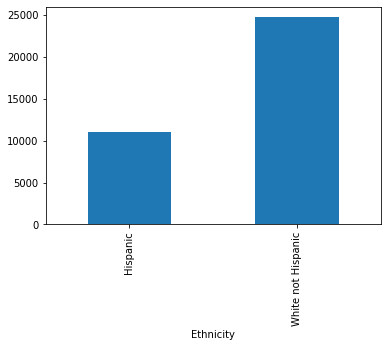

In [2]:
# YOUR CODE HERE
df_residents_hesp = df_residents[df_residents["Ethnicity"] == "Hispanic"]
df_residents_white = df_residents[df_residents["Ethnicity"] == "White not Hispanic"]
frames = [df_residents_hesp, df_residents_white]
df_residents_hesp_white = pd.concat(frames)
df_residents_hesp_white.groupby("Ethnicity")["Expenditures"].mean().plot.bar()

**YOUR EXPLANATION HERE**

There are sinificantly more Expenditures spent on White (not Hispanic) residents than Hispanic residents in this data set.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [3]:
df_residents.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean()

Ethnicity           Age Cohort
American Indian     13 to 17       3726.000000
                    22 to 50      28205.000000
                    51+           56911.000000
Asian               0 to 5         1502.250000
                    13 to 17       3509.100000
                    18 to 21       9598.170732
                    22 to 50      39580.517241
                    51+           54622.615385
                    6 to 12        2164.555556
Black               0 to 5         1083.000000
                    13 to 17       4521.750000
                    18 to 21       8847.444444
                    22 to 50      40573.058824
                    51+           54010.142857
                    6 to 12        2476.454545
Hispanic            0 to 5         1393.204545
                    13 to 17       3955.281553
                    18 to 21       9959.846154
                    22 to 50      40924.116279
                    51+           55585.000000
                    6 to 12  

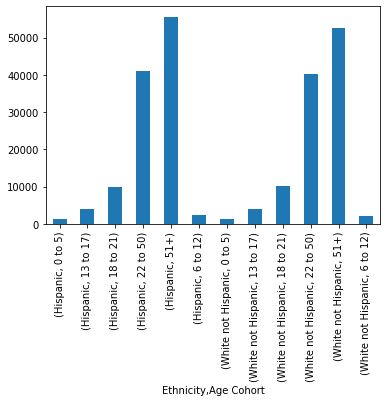

In [4]:
df_residents_hesp_white.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().plot.bar()

These results differ from the observations I made in Question one, because in this graph, it appears that there's approximately the same amount of expenditures spent on those two races within each age cohort. On the contrary, it appeared to be way more for White residents in the previuos graph, which indicates that the different age cohorts affect this data.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [5]:
df_residents_hesp_white.groupby("Ethnicity")["Age Cohort"].value_counts(sort=False)

Ethnicity           Age Cohort
Hispanic            0 to 5         44
                    13 to 17      103
                    18 to 21       78
                    22 to 50       43
                    51+            17
                    6 to 12        91
White not Hispanic  0 to 5         20
                    13 to 17       67
                    18 to 21       69
                    22 to 50      133
                    51+            66
                    6 to 12        46
Name: Age Cohort, dtype: int64

The Hispanic residents had significanlty more younger residents (from age 0-21), and the White residents had significanlty more older residents (22-51+)

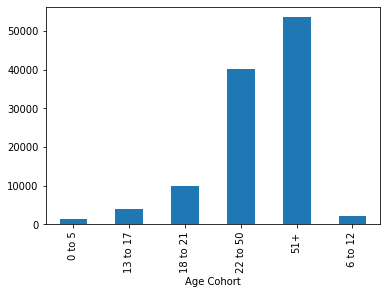

In [6]:
df_residents.groupby("Age Cohort")["Expenditures"].mean().plot.bar()

There are significantly more Expenditures given to older residents than younger residents.

There is a clear discrepancy between the two analyses I conducted above in Questions 1 and Question 2. The graph I produced in Question 1 indicates that There are sinificantly more Expenditures spent on White (not Hispanic) residents than Hispanic residents. While the graph in Question 2 shows that  there's approximately the same amount of expenditures spent on those two races. This makes sense because in the second graph we account for the expenditures within each age cohort. From the grpah above, you can clearly tell that there are significantly more expenditures given to older residents (from age 22-51+) than younger residents (from age 0-21). Based on the distributions of ages of Hispanics and whites, the Hispanic residents had significanlty more younger residents, while the White residents had significanlty more older residents. Therefore, by taking those two factors into account, this illustrates why there was a discrepancy in the two graphs from Q1 and Q2.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.